Enter Youtube URL

In [15]:
# Input the URL of the YouTube playlist you want to download
url = "https://youtube.com/playlist?list=PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW"
genre = ""
channelname_is_artist = True
artist = ""
playlistname_is_album = True
album = ""

Download Mp3 File

In [16]:
import yt_dlp
from mutagen.id3 import ID3, APIC
import os

# Define the options for downloading
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': '%(title)s.%(ext)s',
    'ffmpeg_path': 'C:/ffmpeg/bin/ffmpeg.exe',
    'ffprobe_path': 'C:/ffmpeg/bin/ffprobe.exe',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '320'
    },
    {
        'key': 'FFmpegMetadata', # Include bitrate metadata
    }]
}

# Download the video and convert it to mp3
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url]) 

[youtube:tab] Extracting URL: https://youtube.com/playlist?list=PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Downloading webpage
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: test
[youtube:tab] Playlist test: Downloading 1 items of 1
[download] Downloading item 1 of 1
[youtube] Extracting URL: https://www.youtube.com/watch?v=1vkspazPRps
[youtube] 1vkspazPRps: Downloading webpage
[youtube] 1vkspazPRps: Downloading android player API JSON
[info] 1vkspazPRps: Downloading 1 format(s): 251
[download] Destination: DON BIGG - ٤in (Album Trailer).webm
[download] 100% of  614.43KiB in 00:00:00 at 1.39MiB/s   
[ExtractAudio] Destination: DON BIGG - ٤in (Album Trailer).mp3
Deleting original file DON BIGG - ٤in (Album Trailer).webm (pass -k to keep)
[Metadata] Adding metadata to "DON BIGG - ٤in (Album Trailer).mp3"
[download] Finished downloading playlist: test


In [17]:
import yt_dlp

# Define the options for downloading the thumbnail
ydl_opts_thumb = {
    'ffmpeg_path': 'C:/ffmpeg/bin/ffmpeg.exe',
    'ffprobe_path': 'C:/ffmpeg/bin/ffprobe.exe'
}

# Create a YoutubeDL object and extract the video information
with yt_dlp.YoutubeDL(ydl_opts_thumb) as ydl_thumb:
    info_dict = ydl_thumb.extract_info(url, download=False)

[youtube:tab] Extracting URL: https://youtube.com/playlist?list=PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Downloading webpage
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: test
[youtube:tab] Playlist test: Downloading 1 items of 1
[download] Downloading item 1 of 1
[youtube] Extracting URL: https://www.youtube.com/watch?v=1vkspazPRps
[youtube] 1vkspazPRps: Downloading webpage
[youtube] 1vkspazPRps: Downloading android player API JSON
[download] Finished downloading playlist: test


[generic] Extracting URL: https://i.ytimg.com/vi_webp/1vkspazPRps/maxresdefault.webp
[generic] maxresdefault: Downloading webpage


[info] maxresdefault: Downloading 1 format(s): 0
[download] Destination: maxresdefault [maxresdefault].webp
[download] 100% of  178.66KiB in 00:00:00 at 917.03KiB/s   


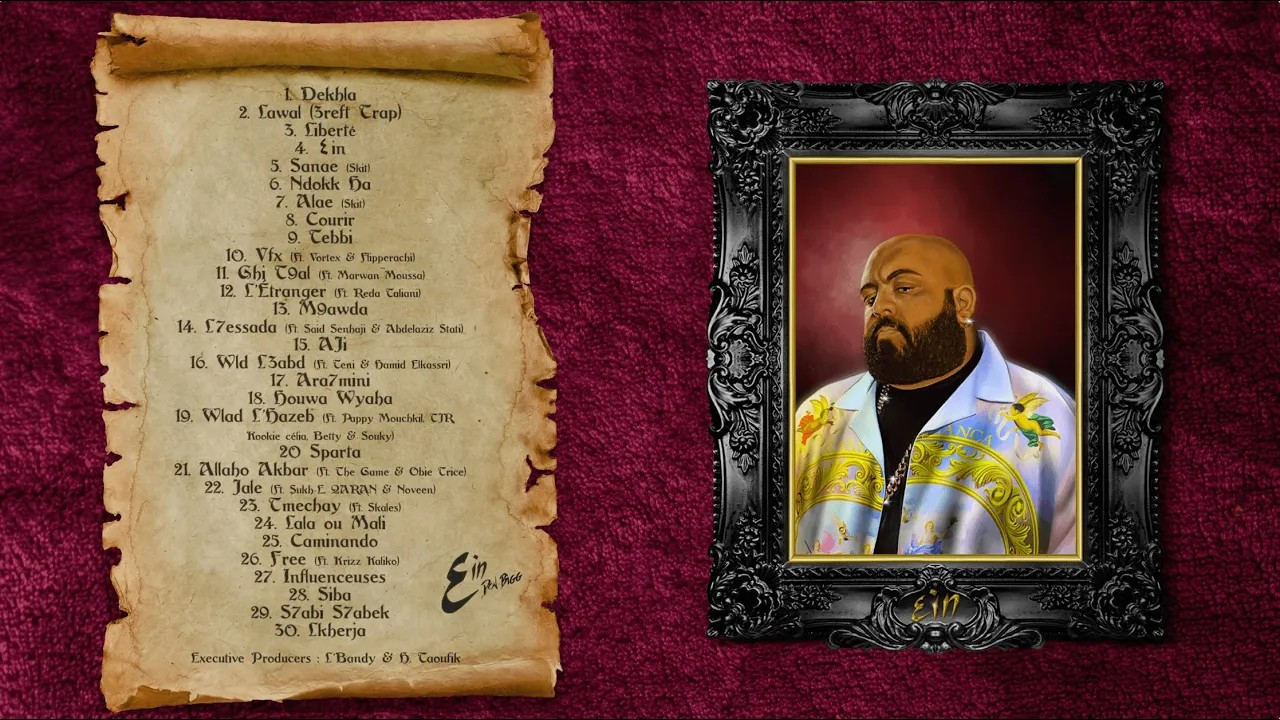

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'maxresdefault [maxresdefault].jpg'

In [21]:
import os
from PIL import Image
import glob
import cv2
from mutagen.id3 import ID3, APIC
from IPython.display import Image as Imagey
import eyed3

# Download the playlist thumbnails
for entry in info_dict['entries']:

    # Download the video thumbnail
    thumbnail_url = entry['thumbnail']
    with yt_dlp.YoutubeDL(ydl_opts_thumb) as ydl_thumb:
            ydl_thumb.download(thumbnail_url)

            file_list = glob.glob('maxresdefault*') # find all files starting with thumbnail_filename
            if file_list: # check if any files were found
                thumbnail_filename = file_list[0] # get the name of the first file

            if os.path.splitext(thumbnail_filename)[1] != '.jpg':
                # Load the image
                img = cv2.imread(thumbnail_filename)
                # Convert the image to jpg format and save it
                cv2.imwrite(os.path.splitext(thumbnail_filename)[0]+'.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

                # Delete the file
                os.remove(thumbnail_filename)
                
                thumbnail_filename = os.path.splitext(thumbnail_filename)[0]+'.jpg'

            #print(img.format)
            display(Imagey(filename = thumbnail_filename))
            
            # Embed the thumbnail in the generated mp3 file
            audio_file = entry['title']+".mp3"
            audio = ID3(audio_file)
            with open(thumbnail_filename, 'rb') as f:
                audio.add(APIC(mime='image/jpeg', type=3, desc=u'Cover', data=f.read()))
            audio.save()

            # Load the mp3 file
            audiofile = eyed3.load(audio_file)
            audiofile.tag.comments[0].text += info_dict['webpage_url'] + "\n" + entry['channel_url']
            
            if not channelname_is_artist:
                audiofile.tag.artist = artist
            if not playlistname_is_album:
                audiofile.tag.album = album
            else:
                audiofile.tag.album = info_dict['title']
            
            audiofile.tag.track_num = None

            audiofile.tag.genre = genre

            audiofile.tag.save()

            # Delete thumbnail
            os.remove(thumbnail_filename)